In [1]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
df=pd.read_csv("https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/Company.csv",sep=",")

In [3]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
X =df.drop(columns='Sales')
y =df['Sales']

In [5]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 667
                                                    )

In [6]:
X_train.shape, X_test.shape

((150, 3), (50, 3))

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(X, y)

LinearRegression()

In [8]:
model.coef_
model.intercept_
y_pred = model.predict(X_test)

In [9]:
res_df = pd.DataFrame(data=list(zip(y_pred, y_test)),columns=['predicted', 'real'])
res_df

,predicted,real
0,20.385544,22.4
1,13.270625,13.2
2,9.840452,10.1
3,9.371454,9.7
4,13.902022,14.6
5,10.194711,10.5
6,18.185120,18.4
7,21.083449,21.5
8,9.826397,10.1
9,10.592440,11.3


In [10]:
res_df['error'] = res_df['real'] - res_df['predicted']
res_df

,predicted,real,error
0,20.385544,22.4,2.014456
1,13.270625,13.2,-0.070625
2,9.840452,10.1,0.259548
3,9.371454,9.7,0.328546
4,13.902022,14.6,0.697978
5,10.194711,10.5,0.305289
6,18.185120,18.4,0.214880
7,21.083449,21.5,0.416551
8,9.826397,10.1,0.273603
9,10.592440,11.3,0.707560


In [11]:
res_df['error'].mean()

0.0585100594010299

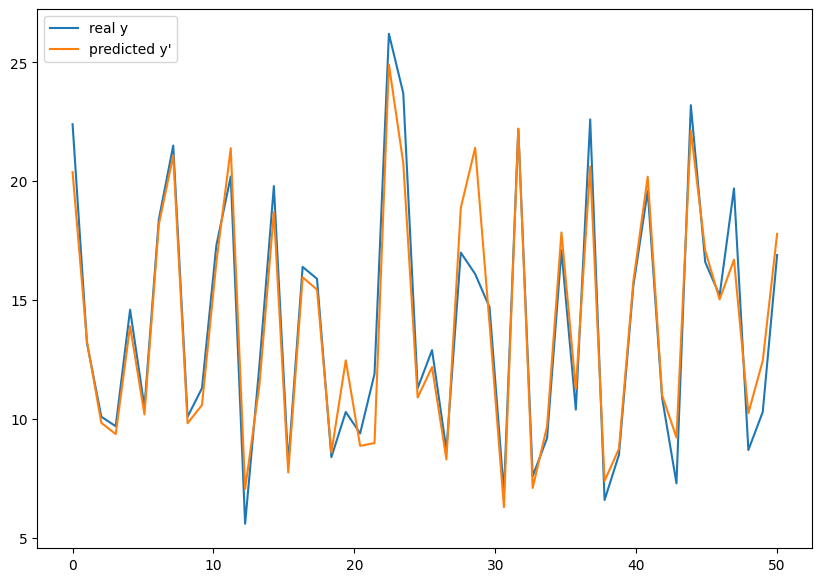

In [12]:
length = y_pred.shape[0] #  
x = np.linspace(0,length,length)

plt.figure(figsize=(10,7))
plt.plot(x, y_test, label='real y')
plt.plot(x, y_pred, label="predicted y'")
plt.legend(loc=2);

In [13]:
#misuro l'errore del mio modello
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error 
r2score= r2_score(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
rmse=mean_squared_error(y_test,y_pred,squared=False)

print('R2_score:', r2score)
print('MAE:',mae)
print('MSE:',mse)
print('RMSE',rmse)

R2_score: 0.9303464725828599
MAE: 0.9925653419688635
MSE: 1.9603258108727855
RMSE 1.4001163561907222
